In [124]:
import pandas as pd

In [125]:
Japon_df = pd.read_csv('sismos_japon.csv')

In [126]:
Japon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hora y dia del Sismo        168 non-null    object 
 1   Latitud                     168 non-null    float64
 2   Longitud                    168 non-null    float64
 3   Magnitud                    168 non-null    float64
 4   Profundidad del Hipocentro  168 non-null    object 
 5   Lugar del Epicentro         168 non-null    object 
dtypes: float64(3), object(3)
memory usage: 8.0+ KB


In [127]:
Japon_df.isnull().sum()

Hora y dia del Sismo          0
Latitud                       0
Longitud                      0
Magnitud                      0
Profundidad del Hipocentro    0
Lugar del Epicentro           0
dtype: int64

In [128]:
#Cambio de Nombres columnas
Japon_df = Japon_df.rename(columns={'Lugar del Epicentro': 'Lugar'})

In [129]:
Japon_df.head()

,Hora y dia del Sismo,Latitud,Longitud,Magnitud,Profundidad del Hipocentro,Lugar
0,2023/06/30 00:48,36.5,140.7,4.0,50km,Alta mar de Prefectura de Ibaraki
1,2023/06/29 22:20,24.8,124.2,3.8,80km,Mares cercanos de Isla Ishigaki
2,2023/06/29 20:01,28.4,129.5,3.1,30km,Mares cercanos de Islas de Amamioshima
3,2023/06/29 02:27,35.0,135.6,2.2,Poco profundo,Sur de Prefectura de Kioto
4,2023/06/28 17:22,44.9,142.1,3.0,10km,Norte de región Soya


**Análisis de ubicación:**

In [130]:
Japon_df['Lugar'].value_counts()

Lugar
Mares cercanos de Islas Tokara                 38
Alta mar de Península de Noto                   9
Región Noto, Prefectura de Ishikawa             8
Alta mar de Prefectura de Miyagi                7
Región Hida, Prefectura de Gifu                 7
Alta mar de Prefectura de Ibaraki               6
Norte de Prefectura de Wakayama                 6
Mares cercanos de Isla de Izu-Oshima            6
Alta mar de Prefectura de Fukushima             4
Norte de Prefectura de Nagano                   4
Alta mar este de Prefectura de Chiba            4
Norte de Prefectura de Ibaraki                  4
Alta mar de Prefectura de Iwate                 3
Mares cercanas de Isla Niijima, Kozujima        3
Noroeste de Prefectura de Chiba                 3
Norte de región Soya                            3
Mares cercanos de Islas de Amamioshima          3
Alta mar este de Península de Osumi             3
Alta mar de Uraga                               3
Alta mar oeste de Península de Satsuma      

Gráfico de barras del top 10 de los lugares con mayor magnitud promedio.

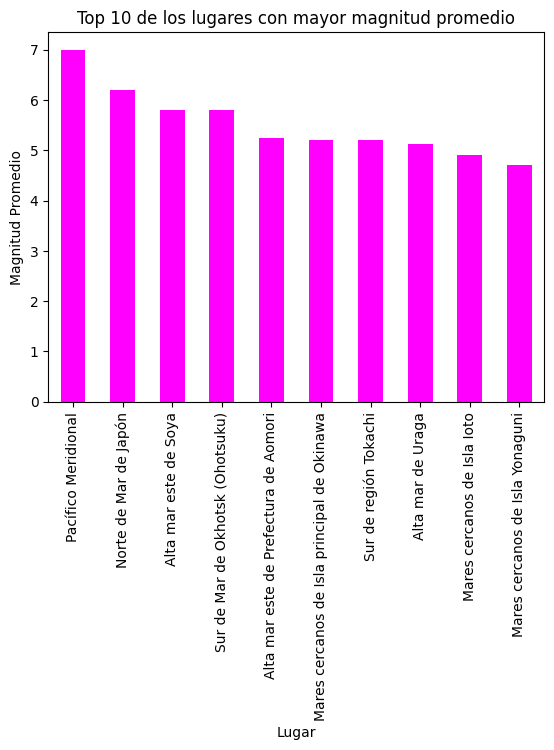

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los sismos por región y calcular la magnitud promedio de cada región
promedio_magnitudes = Japon_df.groupby("Lugar")["Magnitud"].mean()

# Obtener el top 10 de regiones con mayor magnitud promedio
top_10_magnitudes = promedio_magnitudes.nlargest(10)

# Crear un gráfico de barras del top 10 de regiones con mayor magnitud promedio
top_10_magnitudes.plot(kind="bar", color='magenta')

# Configurar el título y etiquetas de los ejes
plt.title("Top 10 de los lugares con mayor magnitud promedio")
plt.xlabel("Lugar")
plt.ylabel("Magnitud Promedio")

# Mostrar el gráfico de barras
plt.show()



**Análisis de magnitud y profundidad:**

Medidas de resumen como la media, mediana, desviación estándar y percentiles:

In [140]:
import pandas as pd

# Cálculo de la media
media = Japon_df["Magnitud"].mean()

# Cálculo de la mediana
mediana = Japon_df["Magnitud"].median()

# Cálculo de la desviación estándar
desviacion_estandar = Japon_df["Magnitud"].std()

# Cálculo de percentiles (25%, 50%, 75%)
percentiles = Japon_df["Magnitud"].quantile([0.25, 0.5, 0.75])

print("Media:", media)
print("Mediana:", mediana)
print("Desviación Estándar:", desviacion_estandar)
print("Percentiles:")
print(percentiles)


Media: 3.308333333333333
Mediana: 3.1
Desviación Estándar: 0.9626197206305853
Percentiles:
0.25    2.5
0.50    3.1
0.75    3.8
Name: Magnitud, dtype: float64


Análisis de la distribución de las magnitudes de los sismos utilizando gráficos de barras o histogramas.

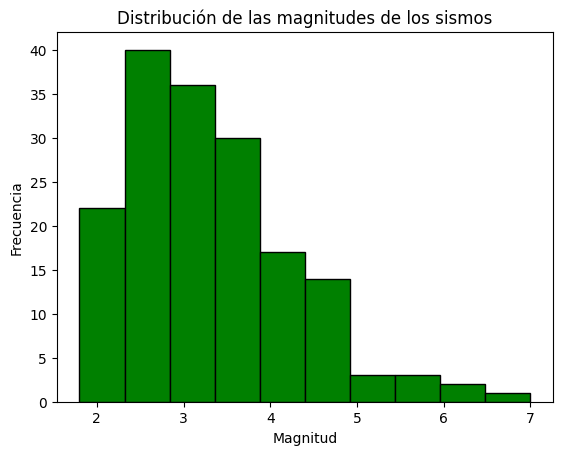

In [167]:
import matplotlib.pyplot as plt

# Crear un histograma de las magnitudes de los sismos
plt.hist(Japon_df["Magnitud"], bins=10, edgecolor='black',color='green')

# Configurar el título y etiquetas de los ejes
plt.title("Distribución de las magnitudes de los sismos")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")

# Mostrar el histograma
plt.show()


Exploramos la posible relación entre la magnitud del sismo y su profundidad, para visualizar mostramos un gráfico de dispersión (scatter plot).

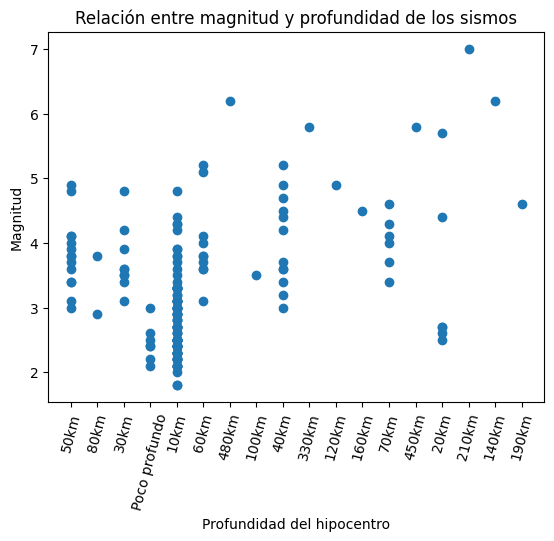

In [145]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión de magnitud vs. profundidad
plt.scatter(Japon_df["Profundidad del Hipocentro"], Japon_df["Magnitud"])

# Configurar el título y etiquetas de los ejes
plt.title("Relación entre magnitud y profundidad de los sismos")
plt.xlabel("Profundidad del hipocentro")
plt.ylabel("Magnitud")
plt.xticks(rotation=75)
# Mostrar el gráfico de dispersión
plt.show()


Graficamos Histograma de Magnitud con una línea de densidad (kde) que muestra la estimación de la distribución de magnitudes.

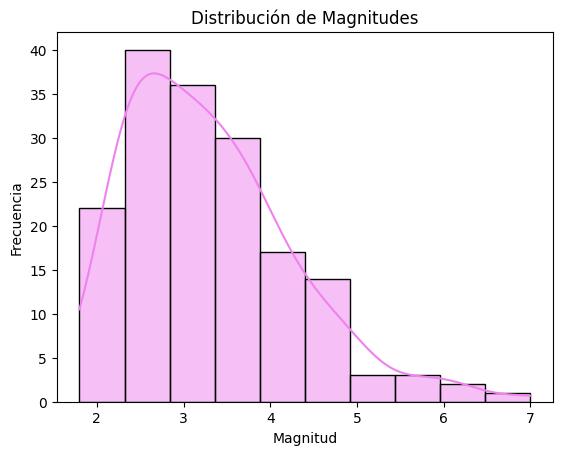

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=Japon_df, x='Magnitud', bins=10, kde=True, color='violet')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de Magnitudes')
plt.show()

Gráfico de dispersión utilizando las columnas "Longitud" y "Latitud" para visualizar la distribución geográfica de los eventos:

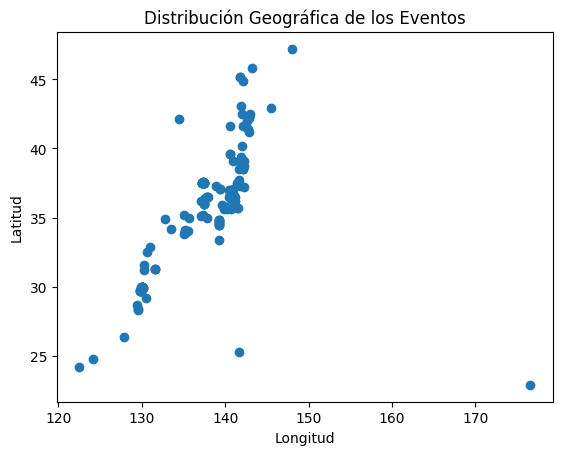

In [133]:
import matplotlib.pyplot as plt

plt.scatter(Japon_df['Longitud'], Japon_df['Latitud'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de los Eventos')
plt.show()


Mapa interactivo de los sismos. Los puntos en el mapa representarán los sismos y al pasar el cursor sobre ellos se mostrará el lugar correspondiente.

In [134]:
import folium

# Crear un mapa de los sismos
mapa = folium.Map(location=[Japon_df['Latitud'].mean(), Japon_df['Longitud'].mean()], zoom_start=3)

# Agregar marcadores para cada sismo
for index, row in Japon_df.iterrows():
    folium.Marker([row['Latitud'], row['Longitud']], popup=row['Lugar']).add_to(mapa)

# Mostrar el mapa
mapa


In [135]:
import pandas as pd

# Dividir la columna "Hora y día del sismo" en fecha y hora
Japon_df['Fecha del sismo'] = pd.to_datetime(Japon_df['Hora y dia del Sismo']).dt.date
Japon_df['Hora del sismo'] = pd.to_datetime(Japon_df['Hora y dia del Sismo']).dt.time

# Eliminar la columna original "Hora y día del sismo"
Japon_df = Japon_df.drop('Hora y dia del Sismo', axis=1)

# Verificar el resultado
print(Japon_df.head())


   Latitud  Longitud  Magnitud Profundidad del Hipocentro  \
0     36.5     140.7       4.0                       50km   
1     24.8     124.2       3.8                       80km   
2     28.4     129.5       3.1                       30km   
3     35.0     135.6       2.2              Poco profundo   
4     44.9     142.1       3.0                       10km   

                                    Lugar Fecha del sismo Hora del sismo  
0       Alta mar de Prefectura de Ibaraki      2023-06-30       00:48:00  
1         Mares cercanos de Isla Ishigaki      2023-06-29       22:20:00  
2  Mares cercanos de Islas de Amamioshima      2023-06-29       20:01:00  
3              Sur de Prefectura de Kioto      2023-06-29       02:27:00  
4                    Norte de región Soya      2023-06-28       17:22:00  


In [136]:
Japon_df.head()

,Latitud,Longitud,Magnitud,Profundidad del Hipocentro,Lugar,Fecha del sismo,Hora del sismo
0,36.5,140.7,4.0,50km,Alta mar de Prefectura de Ibaraki,2023-06-30,00:48:00
1,24.8,124.2,3.8,80km,Mares cercanos de Isla Ishigaki,2023-06-29,22:20:00
2,28.4,129.5,3.1,30km,Mares cercanos de Islas de Amamioshima,2023-06-29,20:01:00
3,35.0,135.6,2.2,Poco profundo,Sur de Prefectura de Kioto,2023-06-29,02:27:00
4,44.9,142.1,3.0,10km,Norte de región Soya,2023-06-28,17:22:00


Creamos dos graficos unos de Lineas para visualizar la distribución temporal y un histograma para visualizar la frecuencia de sismos en diferentes fechas.

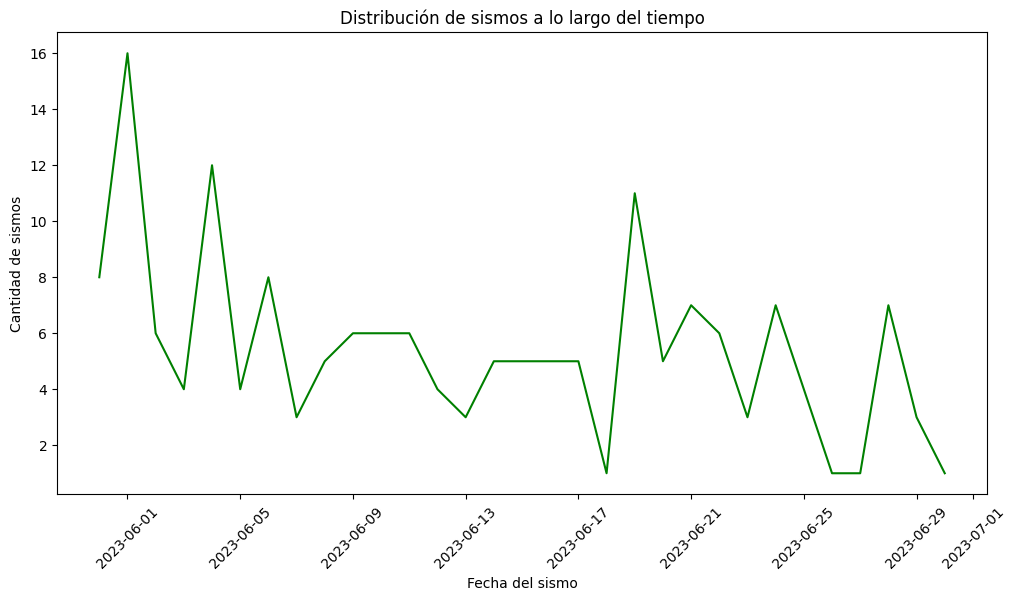

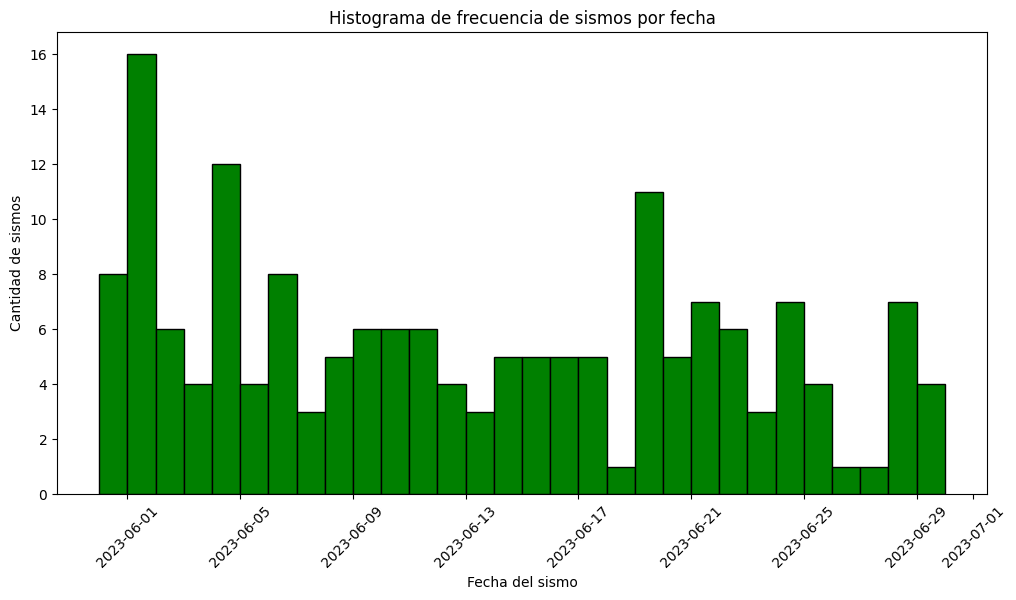

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar y contar los sismos por fecha
sismos_por_fecha = Japon_df['Fecha del sismo'].value_counts().sort_index()

# Crear un gráfico de líneas para visualizar la distribución temporal
plt.figure(figsize=(12, 6))
plt.plot(sismos_por_fecha.index, sismos_por_fecha.values, color='green')
plt.xlabel('Fecha del sismo')
plt.ylabel('Cantidad de sismos')
plt.title('Distribución de sismos a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()

# Crear un histograma para visualizar la frecuencia de sismos en diferentes fechas
plt.figure(figsize=(12, 6))
plt.hist(Japon_df['Fecha del sismo'], bins=30, color='green', edgecolor='black')
plt.xlabel('Fecha del sismo')
plt.ylabel('Cantidad de sismos')
plt.title('Histograma de frecuencia de sismos por fecha')
plt.xticks(rotation=45)
plt.show()


Utilizamos un grafico de barras para Analizar patrones estacionales o tendencias a lo largo de los días de la semana.

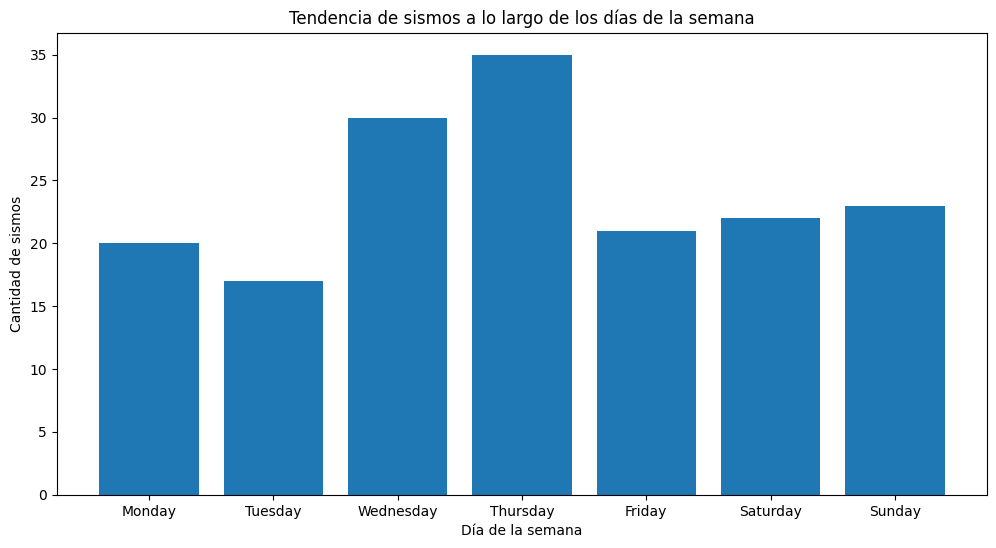

In [138]:
import pandas as pd
import matplotlib.pyplot as plt


# Convierte la columna "Fecha del sismo" en un objeto de fecha y tiempo
Japon_df['Fecha del sismo'] = pd.to_datetime(Japon_df['Fecha del sismo'])

# Extrae información sobre los días de la semana
Japon_df['Día de la semana'] = Japon_df['Fecha del sismo'].dt.day_name()


# Analizar patrones estacionales o tendencias a lo largo de los días de la semana
sismos_por_dia_semana = Japon_df['Día de la semana'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
if not sismos_por_dia_semana.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(sismos_por_dia_semana.index, sismos_por_dia_semana.values)
    plt.xlabel('Día de la semana')
    plt.ylabel('Cantidad de sismos')
    plt.title('Tendencia de sismos a lo largo de los días de la semana')
    plt.show()
else:
    print("No hay datos de sismos por días de la semana.")



Nube de palabras de los Lugares con mas sismos.

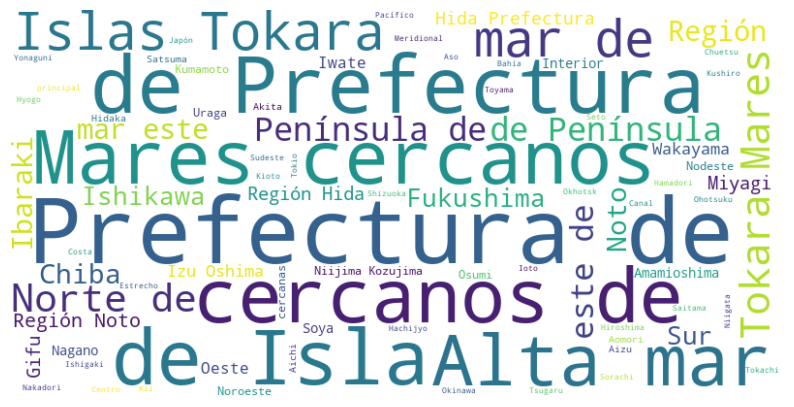

In [166]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Obtener una lista de todos los Lugares
titulos = Japon_df['Lugar'].tolist()

# Unir todos los Lugares en un solo string
text = ' '.join(titulos)

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()